# Biotin porduction in E. coli K12

## 1. Introduction

### 1.1 Literature review of the compound (<500 words)

The newe text that we can add here + 1
Hello this is just a test 

### 1.2 Literature review of the cell factory (<500 words)

•	General advantages

1.	Low energy requirements

2.	Increased output

3.	Shorter lead time

4.	Consistent quality and purity of the product

5.	Sustainability of product production

6.	Potentail customization of production

•	General disadvantages

1.	Difficulties in maintaining in vitro cells in particular conditions

2.	Sometimes the process is not profitable

3.	Complexity in establishing the proper proces

4.	Regulatory difficulties with related strains and its modifications

•	Suitability of the cell factory for the product

The traditional method of biotin production involves chemical synthesis, which is energy-intensive and environmentally hazardous .
In contrast, microbial cell factories offer a sustainable and eco-friendly alternative for biotin production.
They are engineered microbes that can produce biotin in closed bioreactors with high efficiency, specificity, and low energy requirements .
The use of cell factories for biotin production has several advantages over traditional methods.
Firstly, it is a green and sustainable process that reduces the environmental impact of biotin production.
Secondly, it offers higher productivity and improved quality control compared to chemical synthesis methods.
Thirdly, it provides greater flexibility in terms of product customization and optimization.
Finally, it is a cost-effective approach that reduces the overall production cost of biotin.


## 2. Problem definition (<300 words)

## 3. *If Project category I:* Reconstruction of a new GSM for your cell factory host of interest (<1500 words)

or

## 3. *If Project category II:* Selection and assessment of existing GSM (<500 words)

## 4. Computer-Aided Cell Factory Engineering (<1500 words if Category II project; <500 words for Category I project)

Not all reactions required for P3HB production are homologous to the chosen model. The initial engineering step involves incorporating these reactions into the model to facilitate exploratory analysis and enable subsequent modifications.

### 4.1. Addition of the heterologous reaction

It appears that, based on your literature research, P3HB monomers can be synthesized from the universal precursor acetyl-CoA through a series of three reactions facilitated by the genes phaA, phaB, and phaC. For the sake of simplification, the current report often treats P3HB monomers and the polymer as interchangeable entities. [(Figure)](./data/P3HB_route.png)
![P3HB PRODUCTION](./data/P3HB_route.png)
Fig. footer: P3HB, P3HB4HB, and PHBV synthesis pathway in engineered Escherichia coli. Genes: acs, acetyl-CoA synthetase; pta, phosphotransacetylase; ackA, acetate kinase; phaA, β-ketothiolase; phaB, acetoacetyl-CoA reductase; phaC, PHA synthase; sucD, succinate semialdehyde dehydrogenase; 4hbD, 4-hydroxybutyrate dehydrogenase; orfZ, 4-hydroxybutyryl-CoA:CoA transferase; sad and gabD, succinate semialdehyde dehydrogenase of E. coli; pct, propionyl-CoA transferase; prpP, propionate permease. The reactions and intermediates shown in green are associated with 3HB precursor biosynthesis, those in gold with 4HB precursor biosynthesis, those in purple with 3HV precursor biosynthesis, and those in blue with acetate assimilation and TCA cycle

The selected model includes all the necessary reactions except the one responsible for converting 3-hydroxybutyryl-CoA to P3HB. This final reaction has been manually added as outlined [here](01_Heterologous_Pathway.ipynb).

Following the initial manipulation of the model, the pertinent reactions and metabolites can be identified, as presented in the tables below.

| Metabolite identifier | Name | Formula |
|----------|----------|----------|
| accoa_c  | Acetyl-CoA  | C23H34N7O17P3S |
| aacoa_c  | Acetoacetyl-CoA  | C25H36N7O18P3S  |
| 3hbcoa_c  | (S)-3-Hydroxybutanoyl-CoA  | C25H38N7O18P3S |
| P3HB_c  | poly-3-Hydroxybutanoate  | C40H62O21  |

| Reaction identifier | Name | Stoichiometry |
|----------|----------|----------|
| ACACT1r  | Acetyl-CoA C-acetyltransferase  | 2.0 Acetyl-CoA <=> Acetoacetyl-CoA + Coenzyme A |
| HACD1 | 3-hydroxyacyl-CoA dehydrogenase (acetoacetyl-CoA)  | Acetoacetyl-CoA + H+ + Nicotinamide adenine dinucleotide - reduced <=> (S)-3-Hydroxybutanoyl-CoA + Nicotinamide adenine dinucleotide |
| phaC  | 3-Hydroxybutyryl-CoA: P3HB polymerization  | 10 (S)-3-Hydroxybutanoyl-CoA --> poly-3-Hydroxybutanoate + 10 Coenzyme A 



This model is saved as iML1515_het.xml and can be found [here](data/iML1515_het.xml).

The preliminary exploratory analysis of the new heterologous method reveals a maximum P3HB production rate of 1.25 mmol gDW^-1 h^-1 and a theoretical maximum yield of 0.125 mmol P3HB per mmol glucose. Additionally, a phenotype phase plane (PPP) plot for P3HB was generated to analyze the optimal point where both the biomass yield and the highest production of P3HB converge. The PPP plot [(Figure)](data/PPP_plot.png) provides a visual representation of the trade-off between these two objectives, helping identify the 'sweet spot' where the model achieves an optimal balance between robust biomass yield and enhanced P3HB production. This graphical analysis aids in pinpointing strategic points for further exploration and optimization in the heterologous method. 

Based on our analysis, we have chosen to use the intersection of both trends as our reference point. Upon calculating the biomass value at this intersection, we find that the total biomass corresponds to 78% of the maximal biomass point. Consequently, moving forward, we will employ this 78% value as the reference for setting the lower bound on biomass growth. This strategic decision aims to restrict the reduction in biomass production that the model can enact, ensuring a balanced approach that prioritizes increased P3HB production without compromising overall cellular growth.

![PPP](data/PPP_plot.png)

C:\Users\vfier\AppData\Local\Temp\ipykernel_37468\281768124.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


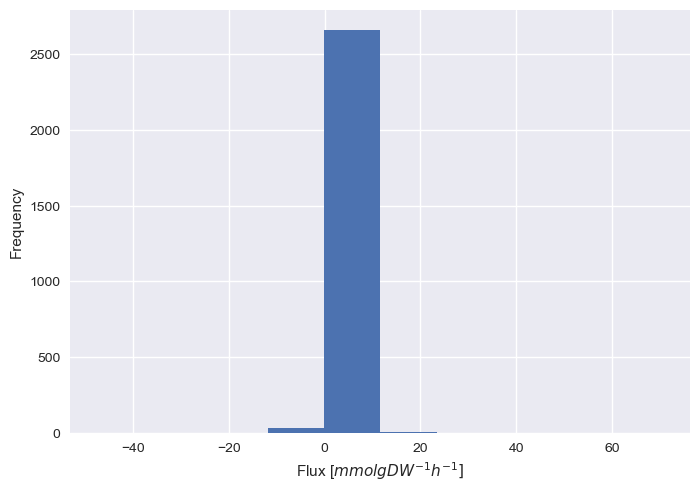

In [67]:
essentiallity = {}
for gene in model.genes:
    with model:
        gene.knock_out()
        essentiallity[gene] = model.slim_optimize(error_value = 0.)

## 5. Discussion (<500 words)

Gene Regulation
Kinetics
Toxicity of substrate/Products
Next steps, continue on combinatory strategies

## 6. Conclusion (<200 words)

## References